In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
tweet_dtypes: dict = {
    "user_id": "str",
    "tweet_id": "str",
    "retweeted_status_id": "str",
    "in_reply_to_status_id": "str"
}
user_dtype: dict = {
    "id": "str"
}

In [3]:
df_tweets = pd.read_csv('tweets.csv', dtype=tweet_dtypes)
df_users = pd.read_csv('users.csv', dtype=user_dtype)

In [4]:
df_users

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,100345056,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
1,247165706,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
2,249538861,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
3,449689677,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0
4,471868887,"Санкт-Петербург, Россия",Маргарита Саваж,23305.0,18401.0,Volgograd,False,ru,MargoSavazh,Честь имею. Нагло врать не умею.,Mon Jan 23 10:26:25 +0000 2012,1480.0,8021.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ReachItDoIt,NaN,NaN,NaN,NaN,NaN
449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KirstenLaDaniel,NaN,NaN,NaN,NaN,NaN
450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gwen_garland,NaN,NaN,NaN,NaN,NaN
451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KlausFinker,NaN,NaN,NaN,NaN,NaN


In [5]:
df_tweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,2532611755,kathiemrr,1.488207e+12,2017-02-27 14:54:00,NaN,NaN,NaN,#ThingsDoneByMistake kissing auntie in the lips,836227891897651201,NaN,"[""ThingsDoneByMistake""]",[],POSTED,[],NaN,NaN
1,2531159968,traceyhappymom,1.471273e+12,2016-08-15 14:50:20,NaN,NaN,NaN,RT @mc_derpin: #TheOlderWeGet the more pessimi...,765198948239810561,NaN,"[""TheOlderWeGet""]",[],POSTED,[],NaN,NaN
2,NaN,evewebster373,1.435701e+12,2015-06-30 21:56:09,NaN,NaN,NaN,RT @dmataconis: Ready To Feel Like A Failure? ...,616002306572746752,NaN,[],[],POSTED,[],NaN,NaN
3,4840551713,blacktolive,1.474013e+12,2016-09-16 08:04:48,18.0,False,17.0,Amen! #blacklivesmatter https://t.co/wGffaOqgzl,776693302926147584,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Blacklivesmatter""]",[],POSTED,[],NaN,NaN
4,1694026190,jacquelinisbest,1.474228e+12,2016-09-18 19:46:25,0.0,False,0.0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,777594647875059712,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",777591478206029824,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203446,1710804738,cookncooks,1.480735e+12,2016-12-03 03:16:17,NaN,NaN,NaN,RT @FairyTale_360: 6) Rexnord Bearings is set ...,804886948712157184,NaN,[],[],POSTED,[],NaN,NaN
203447,2928870434,newspeakdaily,1.475279e+12,2016-09-30 23:39:11,0.0,False,0.0,Will Trump’s Bad Week Hurt the GOP’s Senate Pr...,782001880834592769,"<a href=""http://twitterfeed.com"" rel=""nofollow...","[""Politics""]",[],POSTED,[],NaN,NaN
203448,2951556370,specialaffair,1.473072e+12,2016-09-05 10:45:09,0.0,False,0.0,"China blames United States, journalists for Ob...",772747389287268352,"<a href=""http://twitterfeed.com"" rel=""nofollow...","[""news""]",[],POSTED,[],NaN,NaN
203449,2671070290,patriotblake,1.486385e+12,2017-02-06 12:36:14,NaN,NaN,NaN,RT @bfraser747: 💥💥 #PresidentElectTrump \r\n\r...,828583075810525184,NaN,[],[],POSTED,[],NaN,NaN


In [6]:
df_users.columns

Index(['id', 'location', 'name', 'followers_count', 'statuses_count',
       'time_zone', 'verified', 'lang', 'screen_name', 'description',
       'created_at', 'favourites_count', 'friends_count', 'listed_count'],
      dtype='object')

In [7]:
df_tweets.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'source', 'hashtags',
       'expanded_urls', 'posted', 'mentions', 'retweeted_status_id',
       'in_reply_to_status_id'],
      dtype='object')

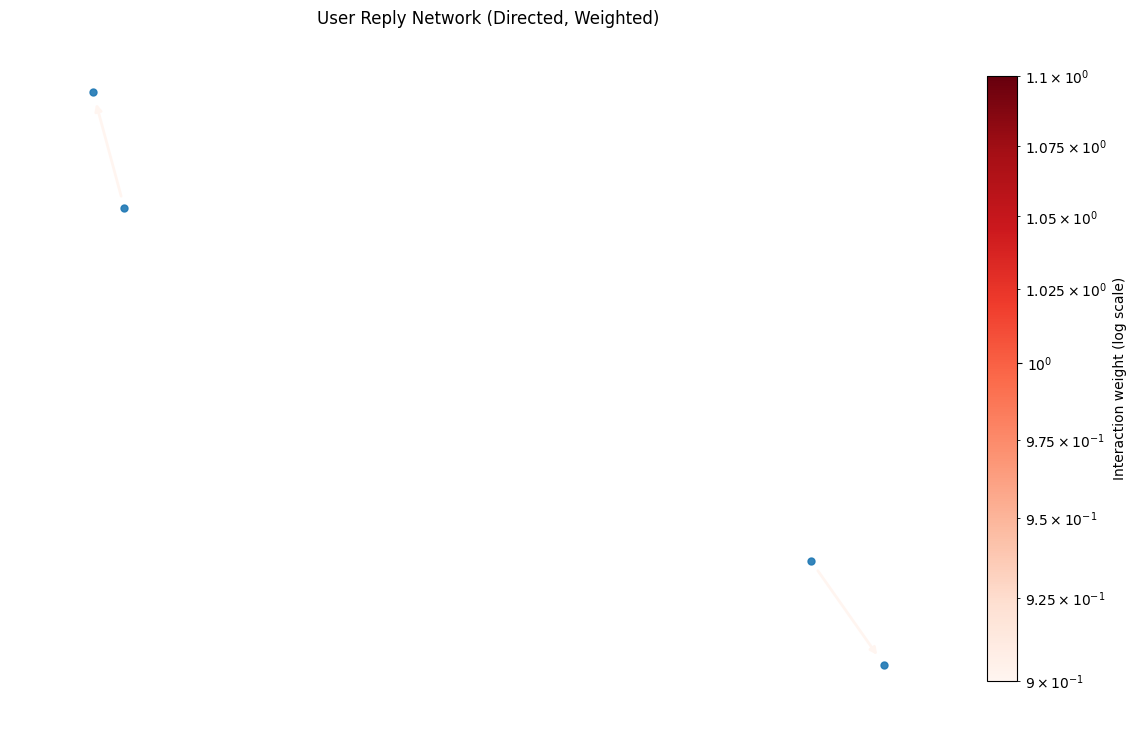

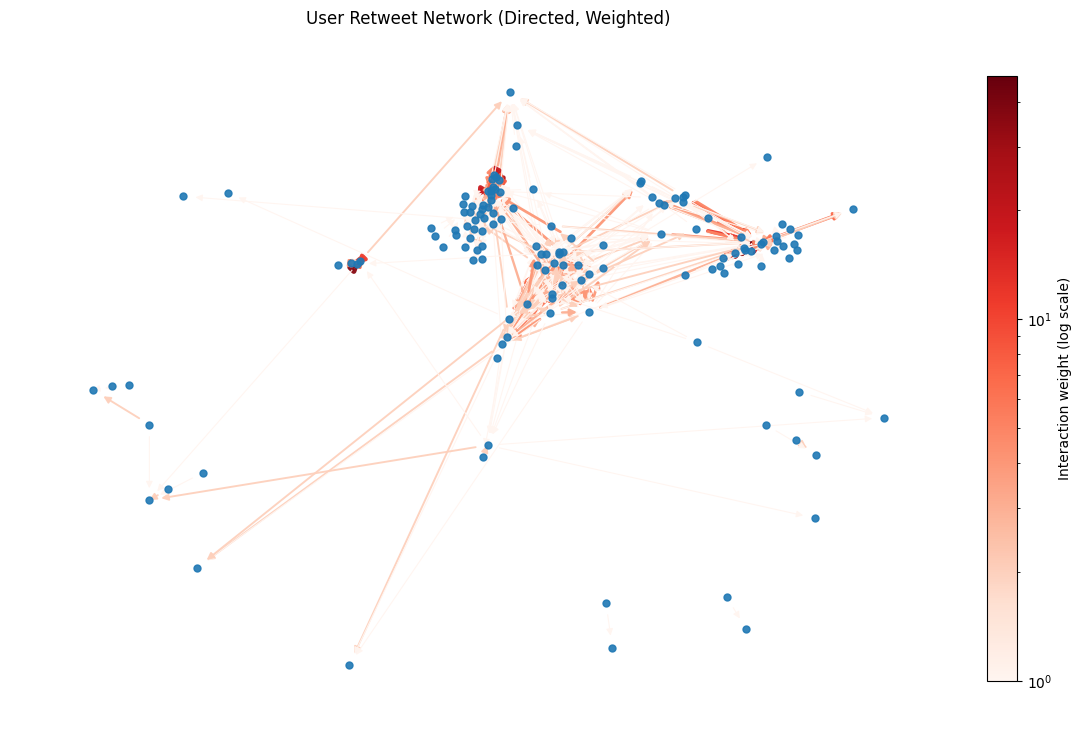

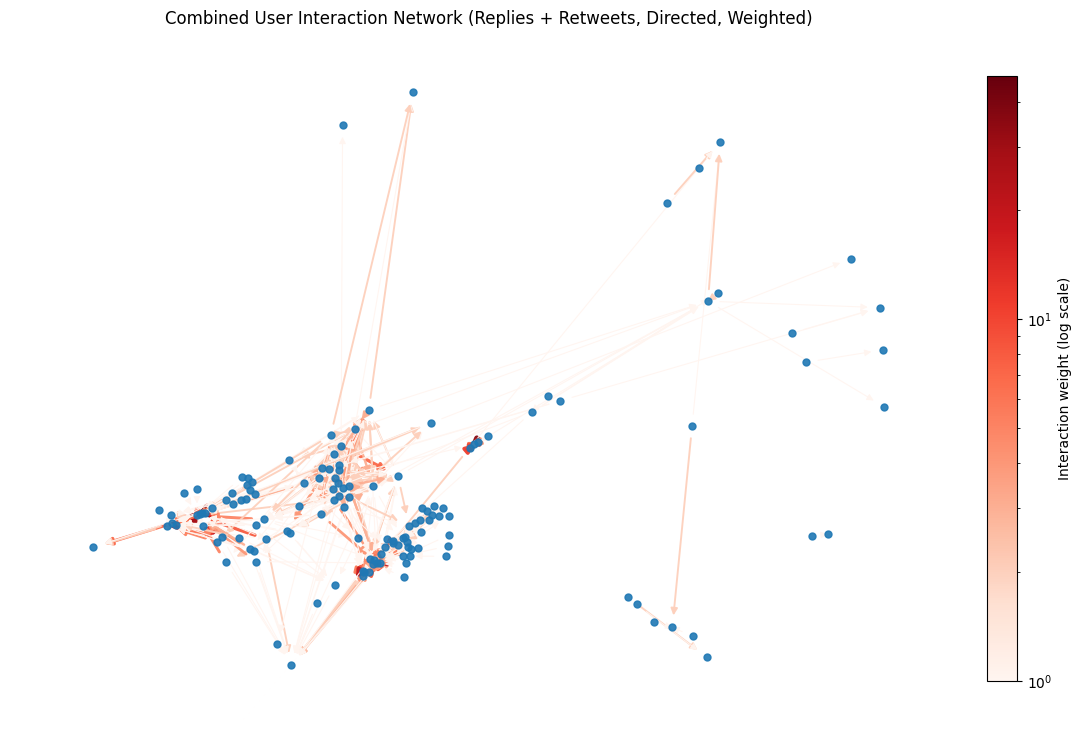

In [10]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

df = df_tweets.copy()

df["tweet_id"] = df["tweet_id"].astype(str)
df["user_id"] = df["user_id"].astype(str)

for col in ["retweeted_status_id", "in_reply_to_status_id"]:
    if col in df.columns:
        df[col] = df[col].astype(str).where(df[col].notna(), pd.NA)

tweet_to_user = df[["tweet_id", "user_id"]].drop_duplicates("tweet_id")

def build_weighted_user_graph(edge_df: pd.DataFrame, u_col: str, v_col: str) -> nx.DiGraph:
    counts = (
        edge_df[[u_col, v_col]]
        .dropna()
        .astype(str)
        .query(f"{u_col} != {v_col}")
        .value_counts()
        .reset_index(name="weight")
    )
    G = nx.DiGraph()
    for u, v, w in counts.itertuples(index=False):
        G.add_edge(u, v, weight=int(w))
    return G

def plot_weighted_graph(G: nx.DiGraph, title: str, seed: int = 42, k: float | None = None):
    fig, ax = plt.subplots(figsize=(13, 9))

    if G.number_of_nodes() == 0:
        ax.set_title(title)
        ax.axis("off")
        plt.show()
        return

    pos = nx.spring_layout(G, seed=seed, k=k)

    weights = np.array([G[u][v].get("weight", 1) for u, v in G.edges()], dtype=float)
    w_min, w_max = max(1.0, weights.min()), weights.max()

    norm = mpl.colors.LogNorm(vmin=w_min, vmax=w_max)
    cmap = plt.cm.Reds
    edge_colors = cmap(norm(weights))

    edge_widths = 0.8 + 3.2 * (np.log(weights) - np.log(w_min)) / (np.log(w_max) - np.log(w_min)) \
        if w_max > w_min else np.full_like(weights, 2.0)

    nx.draw_networkx_nodes(G, pos, node_size=25, alpha=0.9, ax=ax)
    nx.draw_networkx_edges(
        G, pos,
        arrows=True,
        arrowsize=10,
        width=edge_widths,
        edge_color=edge_colors,
        alpha=0.95,
        ax=ax
    )

    ax.set_title(title)
    ax.axis("off")

    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
    cbar.set_label("Interaction weight (log scale)")

    plt.show()

reply_edges = df.loc[df["in_reply_to_status_id"].notna(), ["user_id", "in_reply_to_status_id"]].rename(
    columns={"user_id": "user_u", "in_reply_to_status_id": "parent_tweet_id"}
)
reply_edges = reply_edges.merge(
    tweet_to_user.rename(columns={"tweet_id": "parent_tweet_id", "user_id": "user_v"}),
    on="parent_tweet_id",
    how="left"
).dropna(subset=["user_v"])

retweet_edges = df.loc[df["retweeted_status_id"].notna(), ["user_id", "retweeted_status_id"]].rename(
    columns={"user_id": "user_u", "retweeted_status_id": "parent_tweet_id"}
)
retweet_edges = retweet_edges.merge(
    tweet_to_user.rename(columns={"tweet_id": "parent_tweet_id", "user_id": "user_v"}),
    on="parent_tweet_id",
    how="left"
).dropna(subset=["user_v"])

G_reply = build_weighted_user_graph(reply_edges, "user_u", "user_v")
G_retweet = build_weighted_user_graph(retweet_edges, "user_u", "user_v")

combined_edges = pd.concat(
    [reply_edges[["user_u", "user_v"]], retweet_edges[["user_u", "user_v"]]],
    ignore_index=True
)
G_combined = build_weighted_user_graph(combined_edges, "user_u", "user_v")

plot_weighted_graph(G_reply, "User Reply Network (Directed, Weighted)")
plot_weighted_graph(G_retweet, "User Retweet Network (Directed, Weighted)")
plot_weighted_graph(G_combined, "Combined User Interaction Network (Replies + Retweets, Directed, Weighted)")
